In [2]:
################################################################################
# Author 1:      Daniel Schipfer 
# MatNr 1:       11723440
# Author 2:      Firstname Lastname
# MatNr 2:       01234567
# Author 3:      Firstname Lastname
# MatNr 3:       01234567
# File:          assignment2.ipynb
# Description: ... short description of the file ...
# Comments:    ... comments for the tutors ...
#              ... can be multiline ...
################################################################################

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#import plotly
import numpy as np
#import pycountry
#import pycountry_convert

In [4]:
def get_alcohol_data() -> pd.DataFrame:
    """
    function to load data into a DataFrame, extract the useful colummns and name them more clearly.
    
    Returns:
        Data.Frame
    """
    #
    df = pd.read_csv("alcohol_data.csv")
    df = df[["Reference area", "TIME_PERIOD", "OBS_VALUE"]]
    df = df.rename(columns={"Reference area": "country",
                    "TIME_PERIOD": "year",
                    "OBS_VALUE": "alcohol_consumption (l/person)"
                    }
    )
    return df

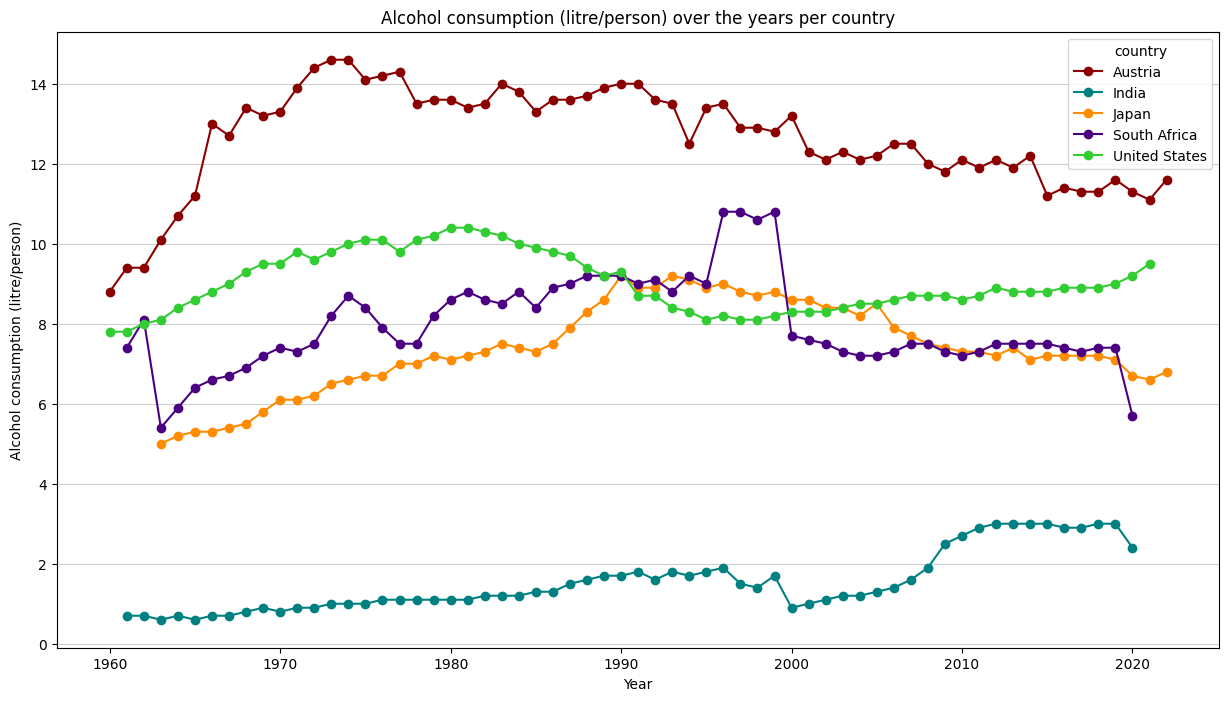

In [5]:
def line_plot(country_names: list[str],
              data: pd.DataFrame = get_alcohol_data(),
              year_range: tuple[int, int] = (1960, 2024)) -> None:
    """
    Creates a line plot for the specified countries and year range. 
    Default data is set and the year range is set at the min/max values (1960, 2024).
    
    Parameters:
        country_names (list[str]): List of country names to include in the plot.
        data (pd.DataFrame): DataFrame containing the data (default is previous DataFrame).
        year_range (tuple[int, int]): Start and end year for the plot (default min/max values (1960, 2024)).

    Returns:
        None: Displays the plot.
    """
    df_filtered = data[
        (data["country"].isin(country_names)) &
        (data["year"] >= year_range[0]) &
        (data["year"] <= year_range[1])
    ]
    
    df_pivot = df_filtered.pivot(
        index="year",
        columns="country",
        values="alcohol_consumption (l/person)"
    )
    
    colors = ["darkred", "teal", "darkorange", "indigo", "limegreen"] if len(country_names) <= 5 else None

    df_pivot.plot(
        figsize=(15,8),
        marker="o",
        color=colors
    )

    plt.title("Alcohol consumption (litre/person) over the years per country")
    plt.xlabel("Year")
    plt.ylabel("Alcohol consumption (litre/person)")
    plt.grid(alpha=.6, axis="y")
    plt.show()

    return None

line_plot(["Austria", "United States", "Japan", "South Africa", "India"])

In [6]:
def get_gini_data(country: list[str], year: int = 2021) -> pd.DataFrame:
    """
    function to load data into a DataFrame, extract the useful colummns and name them more clearly.
    
    Returns:
        Data.Frame
    """
    #
    df = pd.read_csv("income_data.csv")
    df = df[["Reference area", "Measure", "TIME_PERIOD", "OBS_VALUE", "Age"]]
    df = df.rename(columns={"Reference area": "country",
                    "TIME_PERIOD": "year",
                    "OBS_VALUE": "gini_coefficient"
                    }
    )
    df_gini = df[
        (df["Measure"] == "Gini (market income)") & 
        (df["year"] == year) & 
        (df["country"].isin(country)) &
        (df["Age"] == "Total") # needed so we get the total gini_coef and not by age grp
        ] 
    df_gini = df_gini.drop(["Measure", "Age"], axis=1)

    return df_gini

In [7]:
df = get_gini_data(year=2019, country= ["Austria", "Hungary", "United States", "Korea"])
df

,country,year,gini_coefficient
854,Hungary,2019,0.463
25208,United States,2019,0.505
32550,Austria,2019,0.486
37353,Korea,2019,0.404


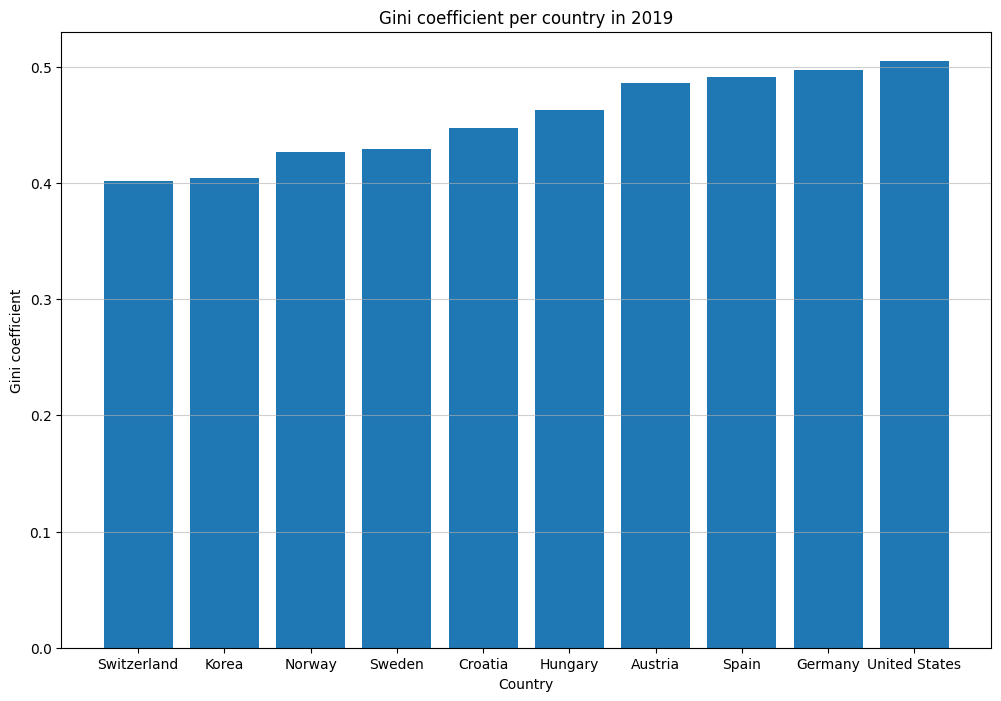

In [24]:
def bar_plot(year: int,
             data: pd.DataFrame) -> None:
    """
    Creates a bar plot for the data.
    
    Parameters:
        data (pd.DataFrame): DataFrame containing the data (default is previous DataFrame).
        
    Returns:
        None: Displays the plot.
    """
        
    data_sorted = data.sort_values('gini_coefficient')

    plt.figure(figsize=(12,8))
    plt.bar(data_sorted["country"],
            data_sorted["gini_coefficient"]
    )

    plt.title(f"Gini coefficient per country in {year}")
    plt.xlabel("Country")
    plt.ylabel("Gini coefficient")
    plt.grid(alpha=.6, axis="y")
    plt.show()

    return None

bar_plot(year=2019,
         data=get_gini_data(year=2019,
                            country= ["Austria", "Hungary", "United States", "Korea", "Germany", "Croatia",
                                                 "Switzerland", "Norway", "Sweden", "Luxemburg", "Spain"]
         )
)